In [468]:
# import necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

from PIL import Image, ImageOps
import cv2

from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import InterclusterDistance
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import cluster

import os

In [469]:
directory = "F:\Ingenieur_IA\P6\cv_nlp\yelp_photos"
df = pd.read_json(directory + "\photos.json", lines=True)

In [470]:
print(f"The dimensions of photos.json are {df.shape[0]} lines and {df.shape[1]} rows.")
df.head(5)

The dimensions of photos.json are 200100 lines and 4 rows.


,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food


In [471]:
labels = df.label.unique().tolist()
labels

['inside', 'outside', 'drink', 'food', 'menu']

In [472]:
# lets save 100 images from each label

sample_df = pd.DataFrame()

for label in labels:
    label_df = df[df["label"] == label].sample(100, random_state=42)
    sample_df = sample_df.append(label_df, ignore_index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5592\4069581389.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(label_df, ignore_index=True)


In [473]:
sample_df

,photo_id,business_id,caption,label
0,cO58-hmFkBxDUQ4B0p40AA,v8IBu8Td9IuIvbcmHv9ZRA,You can bring in a framed pic of your pup to p...,inside
1,7_hiXIbS5Ub0_eiRxr5COg,7rMxt2f3uvC6xPQtHgQKLQ,,inside
2,XseBUNM81RxxtfDgyjxXiA,Uw46n__imJ52D7Zh1vJVrQ,The Cowgirl's bathroom looks like a barn with ...,inside
3,_IRUZoGYSr9bICvBJrPnhw,3oFE-751lsSdkggDd7L-aw,We ID.,inside
4,x8xVVzTI3yW5xZraRZNxfQ,NetawOi6wDa1mGJumW4-zQ,,inside
...,...,...,...,...
495,TrrpkyWzJA1sAY7po9wWNg,xKiTLjsWMHoeutot6lPZIw,Tap List,menu
496,Kq8cwjZdFqRKsssjAfzWdQ,-iGzevsRYAi990-Lt-iMoQ,,menu
497,Ao5u47KHjqq5mKQYuU4pIQ,sihT-_DtwOdnDDDJbXN22A,,menu
498,uSbyFRqroJJsaSfOO_5Ucg,XQoSWEyIGHMIZKxLZOpXSg,,menu


### Example of image preprocessing

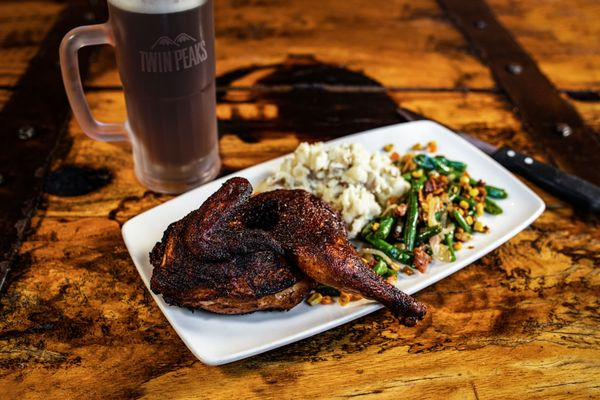

In [474]:
img = Image.open(directory + "\\photos\\" + sample_df.photo_id.iloc[300] + ".jpg")
img

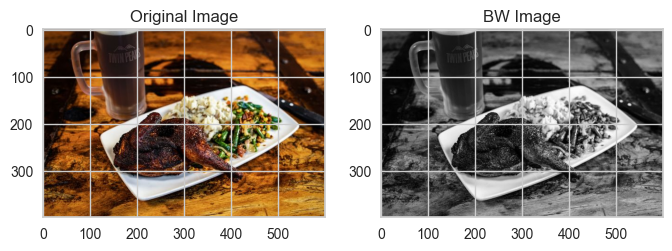

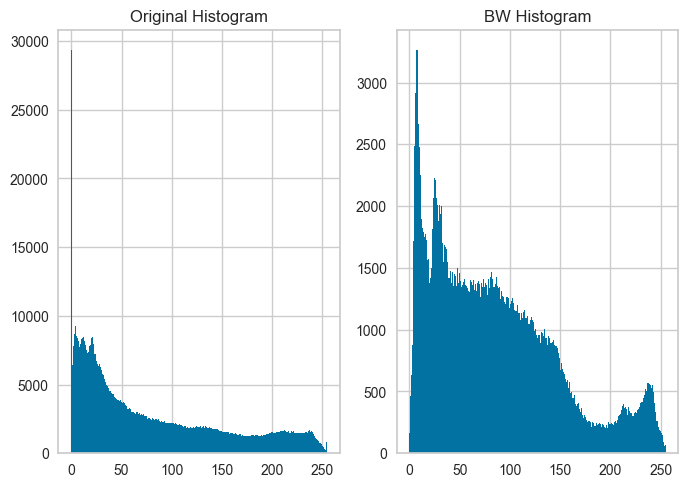

In [475]:
image_color = img
image_bw = ImageOps.grayscale(img)

images = [image_color, image_bw]
titles = ['Original Image', 'BW Image']

# plot images

for i in range(len(images)):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
plt.show()

# plot histograms

images_np = [np.array(i) for i in images]
titles_hists = ['Original Histogram', 'BW Histogram']

for i in range(len(images_np)):
    plt.subplot(1,2,i+1),plt.hist(images_np[i].flatten(), bins=range(256))
    plt.title(titles_hists[i])
plt.show()

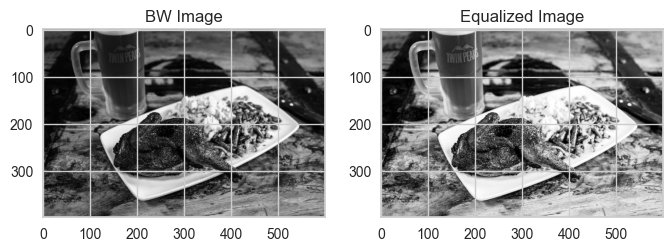

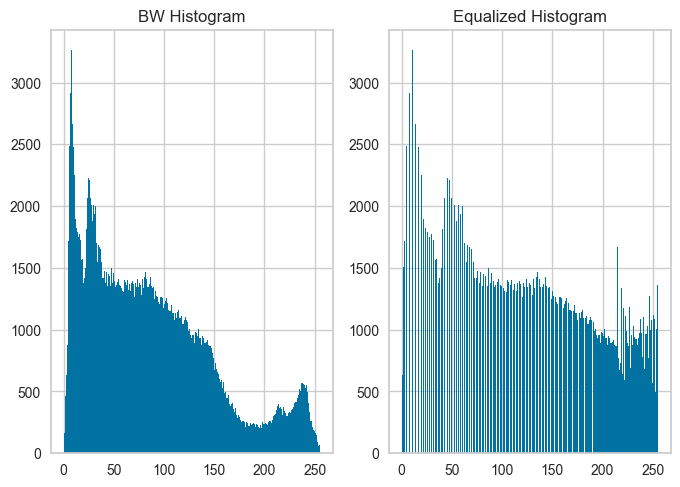

In [476]:
image_bw = ImageOps.grayscale(img)
image_eq = ImageOps.equalize(image_bw)

images = [image_bw, image_eq]
titles = ['BW Image', 'Equalized Image']

# plot images

for i in range(len(images)):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
plt.show()

# plot histograms

images_np = [np.array(i) for i in images]
titles_hists = ['BW Histogram', 'Equalized Histogram']

for i in range(len(images_np)):
    plt.subplot(1,2,i+1),plt.hist(images_np[i].flatten(), bins=range(256))
    plt.title(titles_hists[i])
plt.show()

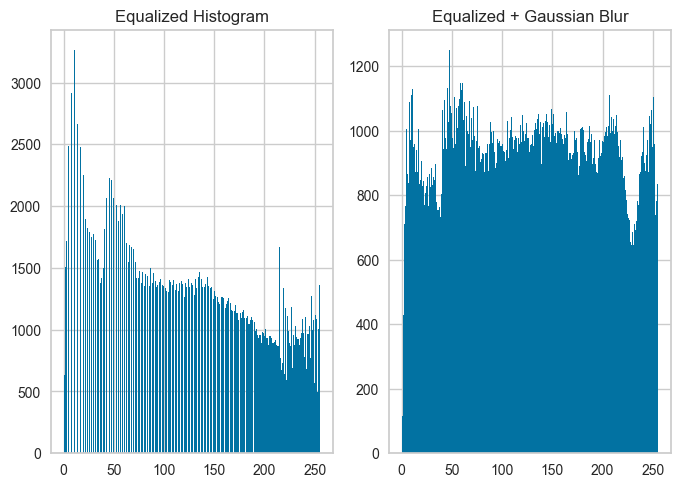

In [477]:
image_blur = cv2.GaussianBlur(np.array(image_eq),(3,3),0)
images_np = [np.array(image_eq), image_blur]
titles_hists = ['Equalized Histogram', 'Equalized + Gaussian Blur']

for i in range(len(images_np)):
    plt.subplot(1,2,i+1),plt.hist(images_np[i].flatten(), bins=range(256))
    plt.title(titles_hists[i])
plt.show()

"ORB performs as well as SIFT on the task of feature detection (and is better than SURF) while being almost two orders of magnitude faster."

In [478]:
orb = cv2.ORB_create(nfeatures=100)
keypoints = orb.detect(image_blur ,None)
keypoints, descriptors = orb.compute(image_blur , keypoints)

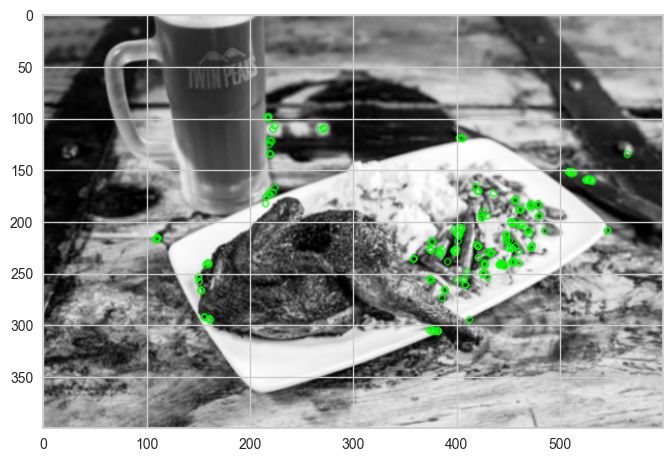

(<matplotlib.image.AxesImage at 0x21ba5b9a440>, None)

In [479]:
image2 = cv2.drawKeypoints(image_blur, keypoints, None, color=(0,255,0), flags=0)
plt.imshow(image2), plt.show()

In [480]:
descriptors

array([[189, 231,  97, ..., 251, 208, 160],
       [ 34, 186, 250, ...,  68, 175, 223],
       [214,  74, 254, ..., 247,  45,  31],
       ...,
       [ 85,  68,  75, ..., 243,  98,  32],
       [221,  91,  75, ..., 163,  41,  84],
       [125, 240, 241, ..., 251,  82,  38]], dtype=uint8)

### Create an array of images in numpy array format

In [481]:
sample_images = []

for i in range(0,sample_df.shape[0]):
    img = Image.open(directory + "\\photos\\" + sample_df.photo_id.iloc[i] + ".jpg")
    img = ImageOps.grayscale(img)
    img = ImageOps.equalize(img)
    img = np.array(img)
    img = cv2.GaussianBlur(img,(3,3),0)
    # img = cv2.resize(img, (224,224))
    sample_images.append(img)

In [482]:
sample_df["np_image"] = sample_images
sample_df.head()

,photo_id,business_id,caption,label,np_image
0,cO58-hmFkBxDUQ4B0p40AA,v8IBu8Td9IuIvbcmHv9ZRA,You can bring in a framed pic of your pup to p...,inside,"[[114, 114, 112, 110, 108, 106, 104, 103, 102,..."
1,7_hiXIbS5Ub0_eiRxr5COg,7rMxt2f3uvC6xPQtHgQKLQ,,inside,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,XseBUNM81RxxtfDgyjxXiA,Uw46n__imJ52D7Zh1vJVrQ,The Cowgirl's bathroom looks like a barn with ...,inside,"[[179, 203, 201, 140, 110, 129, 166, 204, 165,..."
3,_IRUZoGYSr9bICvBJrPnhw,3oFE-751lsSdkggDd7L-aw,We ID.,inside,"[[153, 154, 156, 156, 151, 141, 130, 120, 113,..."
4,x8xVVzTI3yW5xZraRZNxfQ,NetawOi6wDa1mGJumW4-zQ,,inside,"[[164, 163, 159, 151, 143, 133, 117, 100, 88, ..."


### Get descriptors for each image in sample_images

In [483]:
descriptors = []
keypoints = []

orb = cv2.ORB_create(nfeatures=500)

for img in sample_images:
    kp = orb.detect(img,None)
    kp, des = orb.compute(img, kp)
    descriptors.append(des)
    keypoints.append(kp)

In [486]:
desc = []
for i in range(sample_df.shape[0]):
    desc.append(np.concatenate(descriptors[i])[:4500])

In [487]:
np.unique(list(map(len, desc)))

array([4500])

In [488]:
sample_df["descriptors"] = desc
sample_df.head(5)

,photo_id,business_id,caption,label,np_image,descriptors
0,cO58-hmFkBxDUQ4B0p40AA,v8IBu8Td9IuIvbcmHv9ZRA,You can bring in a framed pic of your pup to p...,inside,"[[114, 114, 112, 110, 108, 106, 104, 103, 102,...","[134, 185, 187, 216, 223, 197, 177, 203, 158, ..."
1,7_hiXIbS5Ub0_eiRxr5COg,7rMxt2f3uvC6xPQtHgQKLQ,,inside,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5, 180, 157, 179, 252, 173, 162, 154, 94, 249..."
2,XseBUNM81RxxtfDgyjxXiA,Uw46n__imJ52D7Zh1vJVrQ,The Cowgirl's bathroom looks like a barn with ...,inside,"[[179, 203, 201, 140, 110, 129, 166, 204, 165,...","[50, 81, 122, 172, 122, 193, 31, 104, 21, 68, ..."
3,_IRUZoGYSr9bICvBJrPnhw,3oFE-751lsSdkggDd7L-aw,We ID.,inside,"[[153, 154, 156, 156, 151, 141, 130, 120, 113,...","[221, 239, 156, 63, 186, 114, 30, 175, 246, 25..."
4,x8xVVzTI3yW5xZraRZNxfQ,NetawOi6wDa1mGJumW4-zQ,,inside,"[[164, 163, 159, 151, 143, 133, 117, 100, 88, ...","[189, 126, 106, 43, 214, 191, 194, 240, 117, 2..."


### PCA

In [489]:
pca = PCA(n_components=0.90, random_state=42)
feat_pca = pca.fit_transform(desc)
print("Dimension after PCA reduction : ", feat_pca.shape)

Dimension after PCA reduction :  (500, 391)


### Clustering descriptor

In [490]:
kmeans = KMeans(n_clusters = 5)

In [491]:
label = kmeans.fit_predict(feat_pca)

In [492]:
sample_df["kmeans_label"] = label

In [493]:
sample_df.head(5)

,photo_id,business_id,caption,label,np_image,descriptors,kmeans_label
0,cO58-hmFkBxDUQ4B0p40AA,v8IBu8Td9IuIvbcmHv9ZRA,You can bring in a framed pic of your pup to p...,inside,"[[114, 114, 112, 110, 108, 106, 104, 103, 102,...","[134, 185, 187, 216, 223, 197, 177, 203, 158, ...",1
1,7_hiXIbS5Ub0_eiRxr5COg,7rMxt2f3uvC6xPQtHgQKLQ,,inside,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5, 180, 157, 179, 252, 173, 162, 154, 94, 249...",1
2,XseBUNM81RxxtfDgyjxXiA,Uw46n__imJ52D7Zh1vJVrQ,The Cowgirl's bathroom looks like a barn with ...,inside,"[[179, 203, 201, 140, 110, 129, 166, 204, 165,...","[50, 81, 122, 172, 122, 193, 31, 104, 21, 68, ...",1
3,_IRUZoGYSr9bICvBJrPnhw,3oFE-751lsSdkggDd7L-aw,We ID.,inside,"[[153, 154, 156, 156, 151, 141, 130, 120, 113,...","[221, 239, 156, 63, 186, 114, 30, 175, 246, 25...",2
4,x8xVVzTI3yW5xZraRZNxfQ,NetawOi6wDa1mGJumW4-zQ,,inside,"[[164, 163, 159, 151, 143, 133, 117, 100, 88, ...","[189, 126, 106, 43, 214, 191, 194, 240, 117, 2...",1


In [494]:
print(label)

[1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 1 1 2 2 1 2
 1 1 2 1 2 2 1 2 1 2 1 1 2 4 1 2 1 2 1 2 1 1 2 1 1 1 2 1 2 1 1 2 1 2 1 4 2
 2 1 2 1 1 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 1 2 2 1 1 2 1 2 1 1 2 1 1 2 2
 2 1 2 1 1 1 1 2 4 2 2 2 2 2 1 1 2 2 1 4 1 1 2 1 1 2 1 1 1 4 2 1 2 2 1 2 1
 2 2 1 4 1 2 1 1 1 2 1 1 1 2 2 1 1 2 1 1 2 2 1 1 1 1 1 1 2 1 2 2 1 1 2 0 1
 1 2 2 1 0 1 1 2 1 1 0 1 2 1 2 2 2 2 1 2 2 1 1 1 1 1 2 1 2 3 1 1 1 1 2 2 2
 1 1 1 2 1 1 1 1 3 2 2 1 1 4 1 4 2 4 2 1 1 2 4 2 1 1 1 2 1 1 1 1 1 1 1 4 2
 2 1 1 4 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 4 4 1 4 1 4 2 1 1 2 1 1 2 2 4 2 2
 1 1 2 2 1 1 1 2 2 2 1 2 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1
 1 1 1 4 1 4 2 0 1 1 1 4 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 4 1 1 1 1 2 1 2 4 1
 1 1 1 2 1 4 1 2 2 1 1 2 1 1 1 4 2 2 1 1 1 1 2 4 1 1 1 1 2 1 1 2 2 1 2 2 2
 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2 1 1 2 1 2 2 1 1 1 1 1 2 1 1 2 2 1 1 2 4 1
 1 1 2 1 2 2 1 1 1 1 1 2 1 1 2 4 1 1 2 1 1 4 2 1 2 1 1 2 1 1 2 1 1 1 2 1 1
 1 1 1 1 2 2 2 2 1 1 1 1 

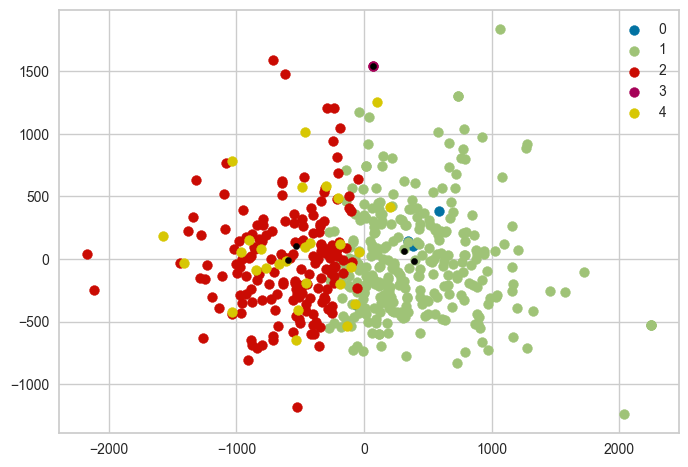

In [495]:
#Getting the Centroids

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(feat_pca[label == i , 0] , feat_pca[label == i , 1] , s=50, label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 20, color = 'black')
plt.legend()
plt.show()

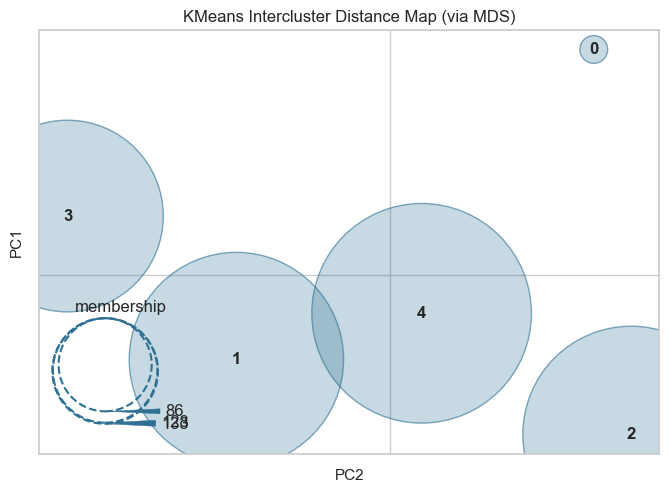

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [496]:
visualizer = InterclusterDistance(KMeans(5))
visualizer.fit(desc)
visualizer.show()

In [497]:
silhouette_score(desc, label)

0.0035589667680477177

In [498]:
sample_df.kmeans_label.value_counts()

1    294
2    172
4     28
0      4
3      2
Name: kmeans_label, dtype: int64

In [499]:
sample_df.groupby(by=sample_df.label).kmeans_label.value_counts()

label    kmeans_label
drink    1               56
         2               31
         4               11
         3                2
food     1               63
         2               28
         4                8
         0                1
inside   1               59
         2               39
         4                2
menu     1               62
         2               35
         4                3
outside  1               54
         2               39
         4                4
         0                3
Name: kmeans_label, dtype: int64

In [500]:
label_names = {'menu':1, 'inside':0, 'outside':2, 'food':4, 'drink':3}

In [501]:
sample_df["true_label"] = sample_df["label"].map(label_names)
sample_df

,photo_id,business_id,caption,label,np_image,descriptors,kmeans_label,true_label
0,cO58-hmFkBxDUQ4B0p40AA,v8IBu8Td9IuIvbcmHv9ZRA,You can bring in a framed pic of your pup to p...,inside,"[[114, 114, 112, 110, 108, 106, 104, 103, 102,...","[134, 185, 187, 216, 223, 197, 177, 203, 158, ...",1,0
1,7_hiXIbS5Ub0_eiRxr5COg,7rMxt2f3uvC6xPQtHgQKLQ,,inside,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5, 180, 157, 179, 252, 173, 162, 154, 94, 249...",1,0
2,XseBUNM81RxxtfDgyjxXiA,Uw46n__imJ52D7Zh1vJVrQ,The Cowgirl's bathroom looks like a barn with ...,inside,"[[179, 203, 201, 140, 110, 129, 166, 204, 165,...","[50, 81, 122, 172, 122, 193, 31, 104, 21, 68, ...",1,0
3,_IRUZoGYSr9bICvBJrPnhw,3oFE-751lsSdkggDd7L-aw,We ID.,inside,"[[153, 154, 156, 156, 151, 141, 130, 120, 113,...","[221, 239, 156, 63, 186, 114, 30, 175, 246, 25...",2,0
4,x8xVVzTI3yW5xZraRZNxfQ,NetawOi6wDa1mGJumW4-zQ,,inside,"[[164, 163, 159, 151, 143, 133, 117, 100, 88, ...","[189, 126, 106, 43, 214, 191, 194, 240, 117, 2...",1,0
...,...,...,...,...,...,...,...,...
495,TrrpkyWzJA1sAY7po9wWNg,xKiTLjsWMHoeutot6lPZIw,Tap List,menu,"[[85, 85, 85, 85, 85, 85, 85, 102, 118, 101, 8...","[229, 101, 153, 214, 252, 46, 229, 132, 88, 17...",2,1
496,Kq8cwjZdFqRKsssjAfzWdQ,-iGzevsRYAi990-Lt-iMoQ,,menu,"[[11, 11, 11, 11, 11, 11, 11, 10, 9, 8, 9, 10,...","[1, 98, 15, 9, 78, 139, 169, 66, 102, 33, 194,...",2,1
497,Ao5u47KHjqq5mKQYuU4pIQ,sihT-_DtwOdnDDDJbXN22A,,menu,"[[56, 58, 62, 61, 59, 65, 68, 60, 58, 61, 59, ...","[72, 110, 147, 229, 75, 104, 33, 70, 58, 166, ...",1,1
498,uSbyFRqroJJsaSfOO_5Ucg,XQoSWEyIGHMIZKxLZOpXSg,,menu,"[[224, 224, 225, 225, 226, 227, 226, 226, 226,...","[169, 165, 123, 67, 244, 143, 103, 117, 112, 7...",2,1


In [502]:
adjusted_rand_score(sample_df.true_label, sample_df.kmeans_label)

0.00012854601793374368

## Supervised learning

In [503]:
sl_df = sample_df[["descriptors", "true_label"]]

In [504]:
sl_df.head()

,descriptors,true_label
0,"[134, 185, 187, 216, 223, 197, 177, 203, 158, ...",0
1,"[5, 180, 157, 179, 252, 173, 162, 154, 94, 249...",0
2,"[50, 81, 122, 172, 122, 193, 31, 104, 21, 68, ...",0
3,"[221, 239, 156, 63, 186, 114, 30, 175, 246, 25...",0
4,"[189, 126, 106, 43, 214, 191, 194, 240, 117, 2...",0


In [505]:
sl_df_cols = pd.DataFrame(sl_df['descriptors'].tolist())
sl_df_cols['true_label'] = sl_df['true_label']
sl_df_cols.head()

,0,1,2,3,4,5,6,7,8,9,...,4491,4492,4493,4494,4495,4496,4497,4498,4499,true_label
0,134,185,187,216,223,197,177,203,158,209,...,230,56,191,245,116,54,251,21,222,0
1,5,180,157,179,252,173,162,154,94,249,...,215,121,43,178,97,118,231,55,175,0
2,50,81,122,172,122,193,31,104,21,68,...,66,211,28,148,160,120,136,54,233,0
3,221,239,156,63,186,114,30,175,246,251,...,68,168,234,254,228,255,43,22,157,0
4,189,126,106,43,214,191,194,240,117,234,...,96,247,115,161,80,90,252,76,104,0


In [506]:
from sklearn.model_selection import train_test_split, cross_val_score
import lightgbm as lgbm
from sklearn import metrics

In [507]:
X_train, X_test, y_train, y_test = train_test_split(sl_df_cols.drop(columns=["true_label"]), sl_df_cols["true_label"], test_size=0.33, random_state=42)

In [508]:
model = lgbm.LGBMClassifier(boosting_type='gbdt', 
                 objective='multiclass', 
                 num_iteration=100, max_depth=4, learning_rate=0.01, 
                 n_estimators=100, nthread=4, silent=False)

In [509]:
cv_results = cross_val_score(model, X_train, y_train, 
                   cv = 2, scoring='accuracy', n_jobs = -1, verbose = 1) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   30.9s finished


In [510]:
model.fit(X_train, y_train, verbose=True)
    
print(); print(cv_results)    
print(); print(model)

# make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)

f:\Ingenieur_IA\P6\cv_nlp\cv_nlp_venv\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
f:\Ingenieur_IA\P6\cv_nlp\cv_nlp_venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
f:\Ingenieur_IA\P6\cv_nlp\cv_nlp_venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_iterations is set=100, num_iteration=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.126315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 363274
[LightGBM] [Info] Number of data points in the train set: 335, number of used features: 4500
[LightGBM] [Info] Start training from score -1.806797
[LightGBM] [Info] Start training from score -1.639743
[LightGBM] [Info] Start training from score -1.496642
[LightGBM] [Info] Start training from score -1.523671
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

In [511]:
print(); print(metrics.classification_report(expected_y, predicted_y))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))


              precision    recall  f1-score   support

           0       0.45      0.11      0.18        45
           1       0.31      0.31      0.31        35
           2       0.32      0.52      0.39        25
           3       0.23      0.37      0.29        27
           4       0.17      0.18      0.18        33

    accuracy                           0.27       165
   macro avg       0.30      0.30      0.27       165
weighted avg       0.31      0.27      0.26       165


[[ 5  9 10 11 10]
 [ 2 11  3 12  7]
 [ 0  4 13  5  3]
 [ 2  0  6 10  9]
 [ 2 11  9  5  6]]


In [512]:
metrics.confusion_matrix(expected_y, predicted_y)

array([[ 5,  9, 10, 11, 10],
       [ 2, 11,  3, 12,  7],
       [ 0,  4, 13,  5,  3],
       [ 2,  0,  6, 10,  9],
       [ 2, 11,  9,  5,  6]], dtype=int64)

In [513]:
from yellowbrick.classifier import ClassificationReport

In [514]:
visualizer = ClassificationReport(model, classes=[0, 1, 2, 3, 4], support=True)

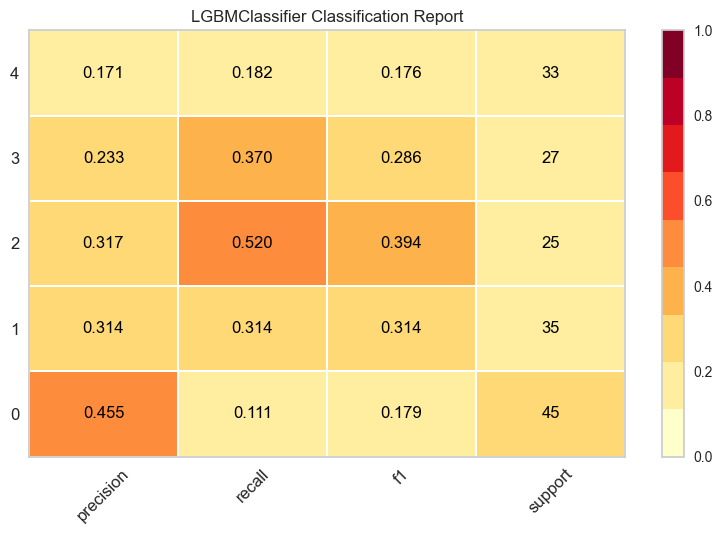

<AxesSubplot: title={'center': 'LGBMClassifier Classification Report'}>

In [515]:
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

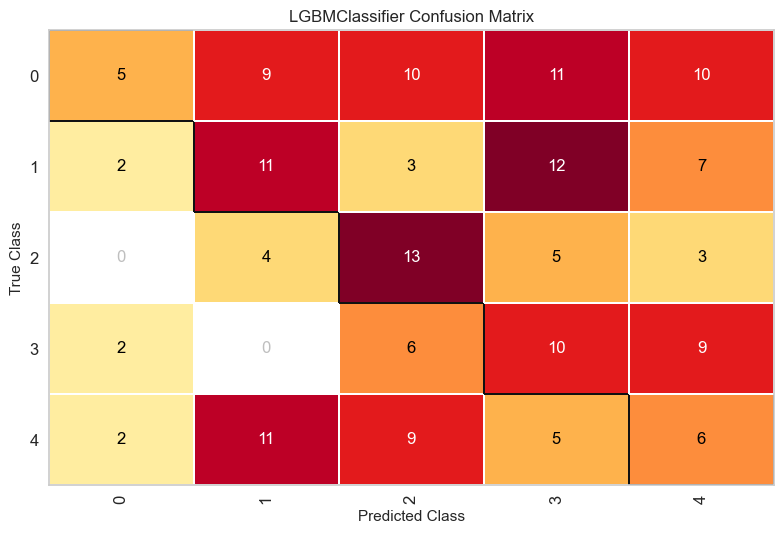

<AxesSubplot: title={'center': 'LGBMClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [516]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(model, classes=[0, 1, 2, 3, 4])

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

## Deep Learning Keras